<h1> <center> Ne Obliviscaris Member's Top 10 2019 </center></h1>

<h2><center> Summary of results </center> </h2>

These are the resulst of the 2019 Patreon's member survey.   Below this is the python code that was used to generate the data. 

<h3><center> Member's Top 10 </center></h3>

<img src="Top10.png" alt="Smiley face" height=1200 width="1200">

<h3><center> Member's Top 20 </center></h3>
<img src="Top20.png" alt="Smiley face" height="1200" width="1200">

<h3><center> Member's Total Score </center></h3>
<img src="Total.png" alt="Smiley face" height="1200" width="1200">

<center> Please report any errors to <a href="mailto:d.marrable@curtin.edu.au">Daniel Marrable</a> </center>




In [125]:
import pandas as pd
import pylab
import numpy as np

## Read in the data file and preview the first few rows

In [126]:
#votes = pd.read_excel('Test Results.xlsx')
votes = pd.read_excel('Final - Ne Obliviscaris - Patreon Exclusive Top 10 (Responses).xlsx')
votes.head()

,Timestamp,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.
0,2019-11-23 06:39:03.132,Turilli/Lione Rhapsody - Zero Gravity (Rebirth...,Delain - Hunter's Moon,Mike Orlando - Sonic Stomp,Orpheus Omega - Wear Your Sins,Lacrimas Profundere - Bleeding the Stars,Battle Beast - No More Hollywood Endings,Equilibrium - Renegades,Suldusk - Lunar Falls,Avantasia - Moonglow,Sabaton - The Great War
1,2019-11-23 06:43:19.995,Devin Townsend - Empath,Wilderun - Veil of Imagination,Edge of Reality - In Static,Astronoid - Astronoid,Red Cain - Kindred: Act 1,"E.A.R. - A æ u å æ ø i æ å, æ i å u å æ ø i æ å?",Aephanemer - Prokopton,Ancient Bards - Origine,Cellar Darling - The Spell,Darkwater - Human
2,2019-11-23 06:44:02.632,Soen - Lotus,Leprous - Pitfalls,Voyager - Colours in the Sun,Allegaeon - Apoptosis,Insomnium - Heart Like a Grave,Belzebubs - Pantheon of the Nightside Gods,Alcest - Spiritual Instinct,Swallow the Sun - When a Shadow is Forced Into...,Shadow of Intent - Melancholy,Myrath - Shehili
3,2019-11-23 06:44:31.473,Wilderun - Veil of Imagination,Thank You Scientist - Terraformer,Louise Burns - Portraits,Soen - Lotus,Maggie Rogers - Heard It In A Past Life,Opeth - In Cauda Venenum,Leprous - Pitfalls,Copeland - Blushing,Yellow Eyes - Rare Field Ceiling,Waste of Space Orchestra – Syntheosis
4,2019-11-23 06:46:50.632,Insomnium - Heart Like a Grave,Saor - Forgotten Paths,Obsequiae - The Palms of Sorrowed Kings,Tomb Mold - Planetary Clairvoyance,Fit For an Autopsy - The Sea of Tragic Beasts,Polyphia - New Levels New Devils,Blood Incantation - Hidden History of the Huma...,Eluveitie - Ategnatos,Alcest - Spiritual Instinct,Pup - Morbid Stuff


## Setup the score tier

In [127]:
score = np.linspace(10, 1, 10)
score

array([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

## Here we go through each entry and split the band and album using `-` we also use `upper()`  to normalise the chars 

In [128]:
band = np.empty((votes.shape[0], votes.shape[1]), dtype=object)
album = np.empty_like(band)


for jj in range(votes.shape[1]):
    tmp = votes.iloc[:, jj]
    for ii, item in enumerate(tmp):
        try:
            ## we change all characters to uppercase and use the '-' to split sthe band and album 
            band[ii, jj], album[ii, jj] = tmp[ii].upper().split('-')  

            ## Strip the any leading or lagging white space
            band[ii, jj] = band[ii, jj].strip(' ')
            album[ii, jj] = album[ii, jj].strip(' ')
        except:
            ## If we fail for some reason we write the line number so we can comeback later and investigate
            band[ii, jj], album[ii, jj] == str(f'{ii},{jj}')




## Quick look at both data arrays band and album 

In [129]:
band.shape

(81, 11)

In [130]:
album

array([[None, 'ZERO GRAVITY (REBIRTH AND EVOLUTION)', "HUNTER'S MOON",
        'SONIC STOMP', 'WEAR YOUR SINS', 'BLEEDING THE STARS',
        'NO MORE HOLLYWOOD ENDINGS', 'RENEGADES', 'LUNAR FALLS',
        'MOONGLOW', 'THE GREAT WAR'],
       [None, 'EMPATH', 'VEIL OF IMAGINATION', 'IN STATIC', 'ASTRONOID',
        'KINDRED: ACT 1', 'A Æ U Å Æ Ø I Æ Å, Æ I Å U Å Æ Ø I Æ Å?',
        'PROKOPTON', 'ORIGINE', 'THE SPELL', 'HUMAN'],
       [None, 'LOTUS', 'PITFALLS', 'COLOURS IN THE SUN', 'APOPTOSIS',
        'HEART LIKE A GRAVE', 'PANTHEON OF THE NIGHTSIDE GODS',
        'SPIRITUAL INSTINCT', 'WHEN A SHADOW IS FORCED INTO THE LIGHT',
        'MELANCHOLY', 'SHEHILI'],
       [None, 'VEIL OF IMAGINATION', 'TERRAFORMER', 'PORTRAITS', 'LOTUS',
        'HEARD IT IN A PAST LIFE', 'IN CAUDA VENENUM', 'PITFALLS',
        'BLUSHING', 'RARE FIELD CEILING', None],
       [None, 'HEART LIKE A GRAVE', 'FORGOTTEN PATHS',
        'THE PALMS OF SORROWED KINGS', 'PLANETARY CLAIRVOYANCE',
        'THE SEA

In [131]:
band

array([[None, 'TURILLI/LIONE RHAPSODY', 'DELAIN', 'MIKE ORLANDO',
        'ORPHEUS OMEGA', 'LACRIMAS PROFUNDERE', 'BATTLE BEAST',
        'EQUILIBRIUM', 'SULDUSK', 'AVANTASIA', 'SABATON'],
       [None, 'DEVIN TOWNSEND', 'WILDERUN', 'EDGE OF REALITY',
        'ASTRONOID', 'RED CAIN', 'E.A.R.', 'AEPHANEMER', 'ANCIENT BARDS',
        'CELLAR DARLING', 'DARKWATER'],
       [None, 'SOEN', 'LEPROUS', 'VOYAGER', 'ALLEGAEON', 'INSOMNIUM',
        'BELZEBUBS', 'ALCEST', 'SWALLOW THE SUN', 'SHADOW OF INTENT',
        'MYRATH'],
       [None, 'WILDERUN', 'THANK YOU SCIENTIST', 'LOUISE BURNS', 'SOEN',
        'MAGGIE ROGERS', 'OPETH', 'LEPROUS', 'COPELAND', 'YELLOW EYES',
        None],
       [None, 'INSOMNIUM', 'SAOR', 'OBSEQUIAE', 'TOMB MOLD',
        'FIT FOR AN AUTOPSY', 'POLYPHIA', 'BLOOD INCANTATION',
        'ELUVEITIE', 'ALCEST', 'PUP'],
       [None, 'HEILUNG', 'DEVIN TOWNSEND', 'OPETH', 'TOOL', 'SKALD',
        'ELUVEITIE', 'AMON AMARTH', 'RAMMSTEIN', 'LACUNA COIL',
        'SABATON'],

## We count the number of occurencies that are the same.  :: NOT checking for typos here just yet.  we will worry about that later

In [132]:
band_count_list = []
album_count_list = []

for ii in range(band.shape[1]):
    band_count_list.append(pd.Series(band[:, ii]).value_counts())
    #album_count_list.append(pd.Series(album[:, ii]).value_counts())

In [133]:
print(len(band_count_list))
#print(len(album_count_list))

11


## We plot the number of votes each band got in the top tier 

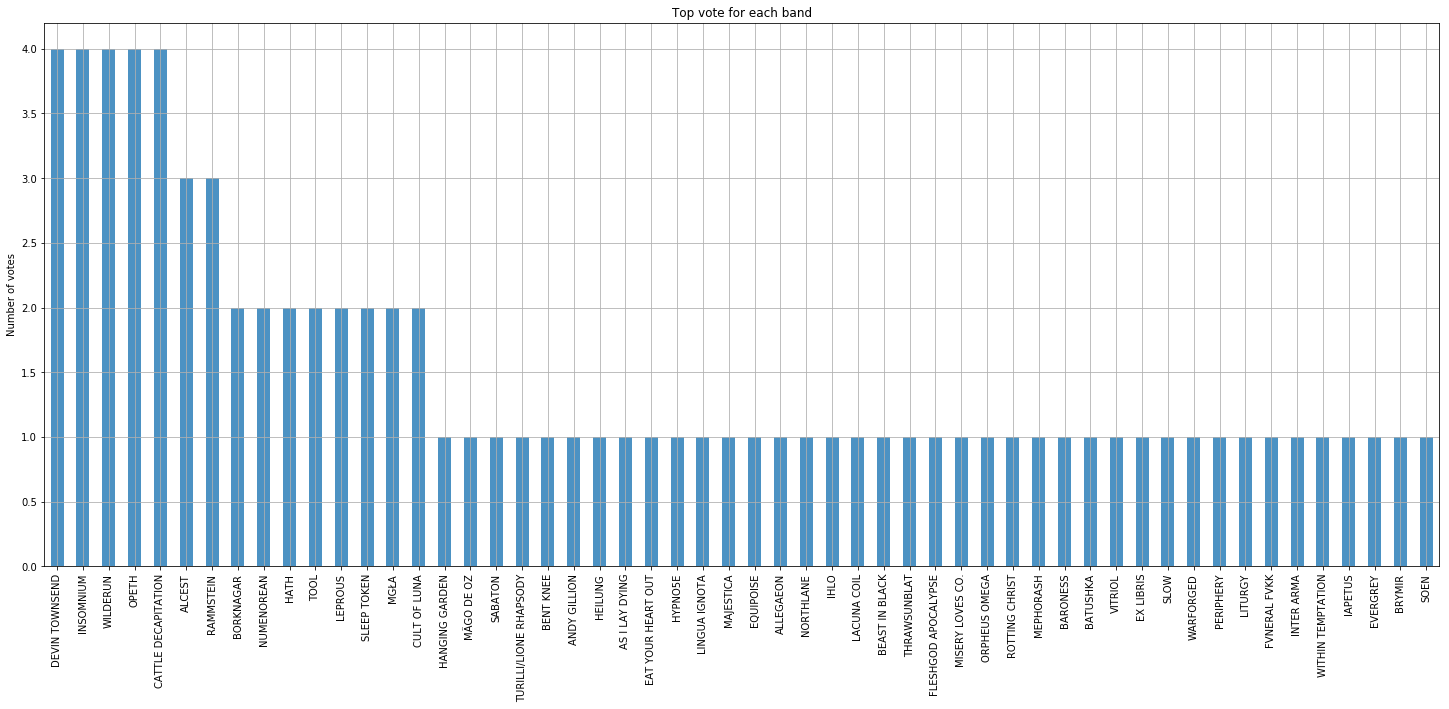

In [134]:
pylab.figure(figsize=(25,10))
band_count_list[1].plot('bar', alpha=0.8)

pylab.title('Top vote for each band')
pylab.ylabel('Number of votes')
pylab.grid()

## now for each tier

1
2
3
4
5
6
7
8
9
10


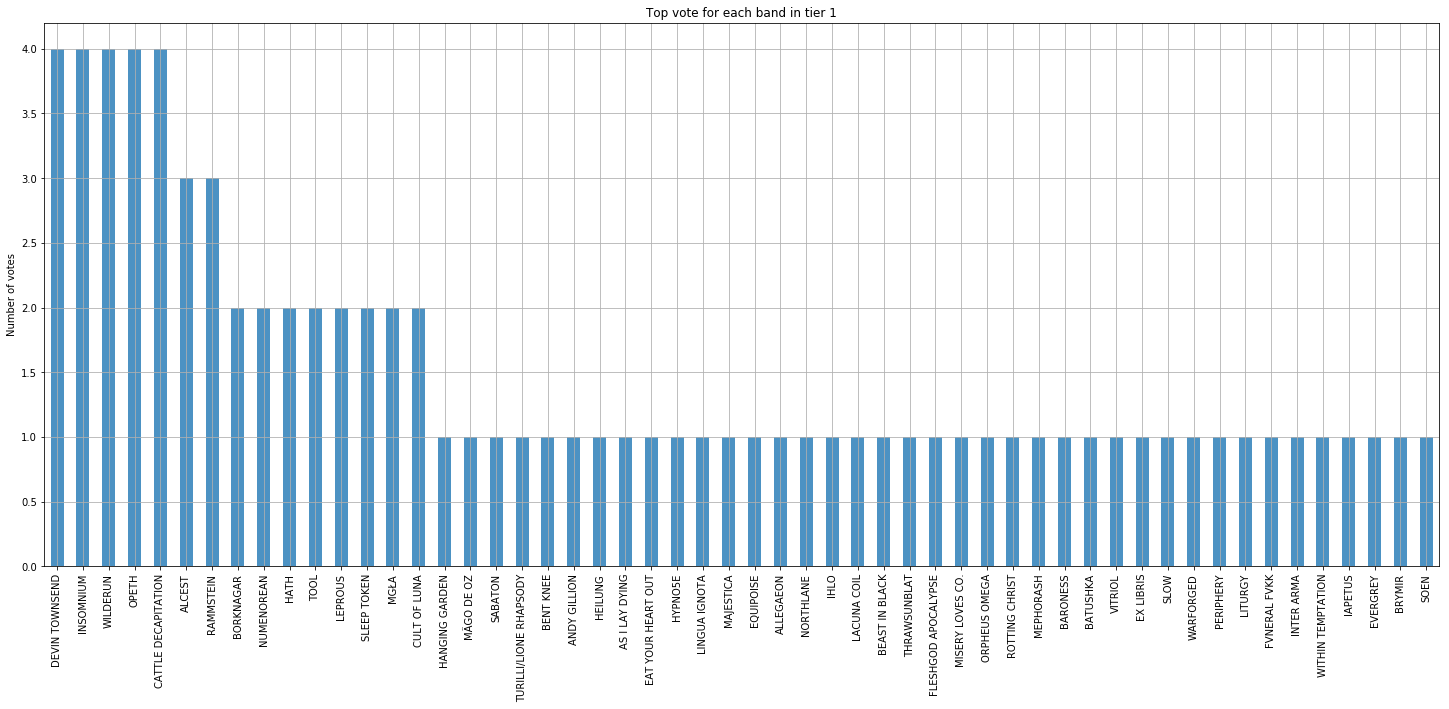

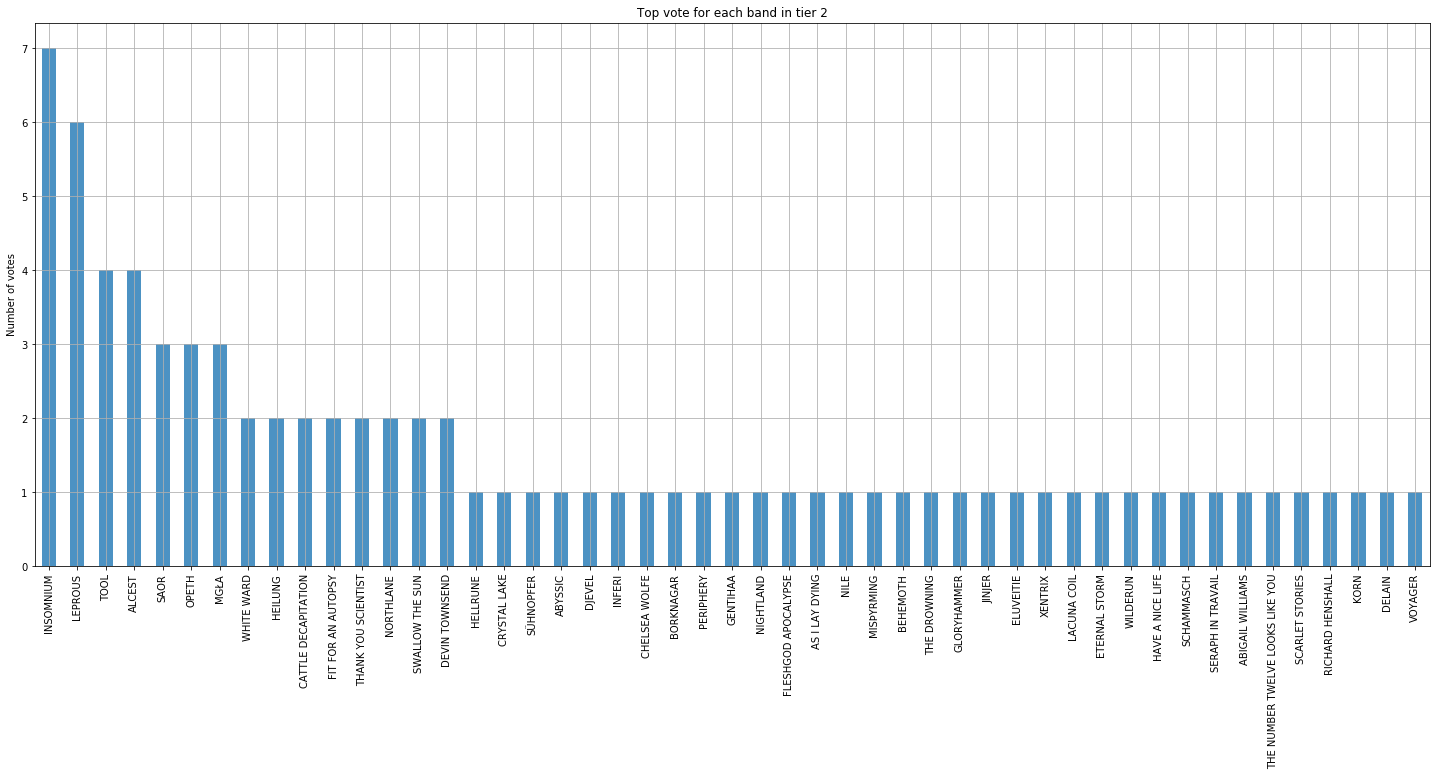

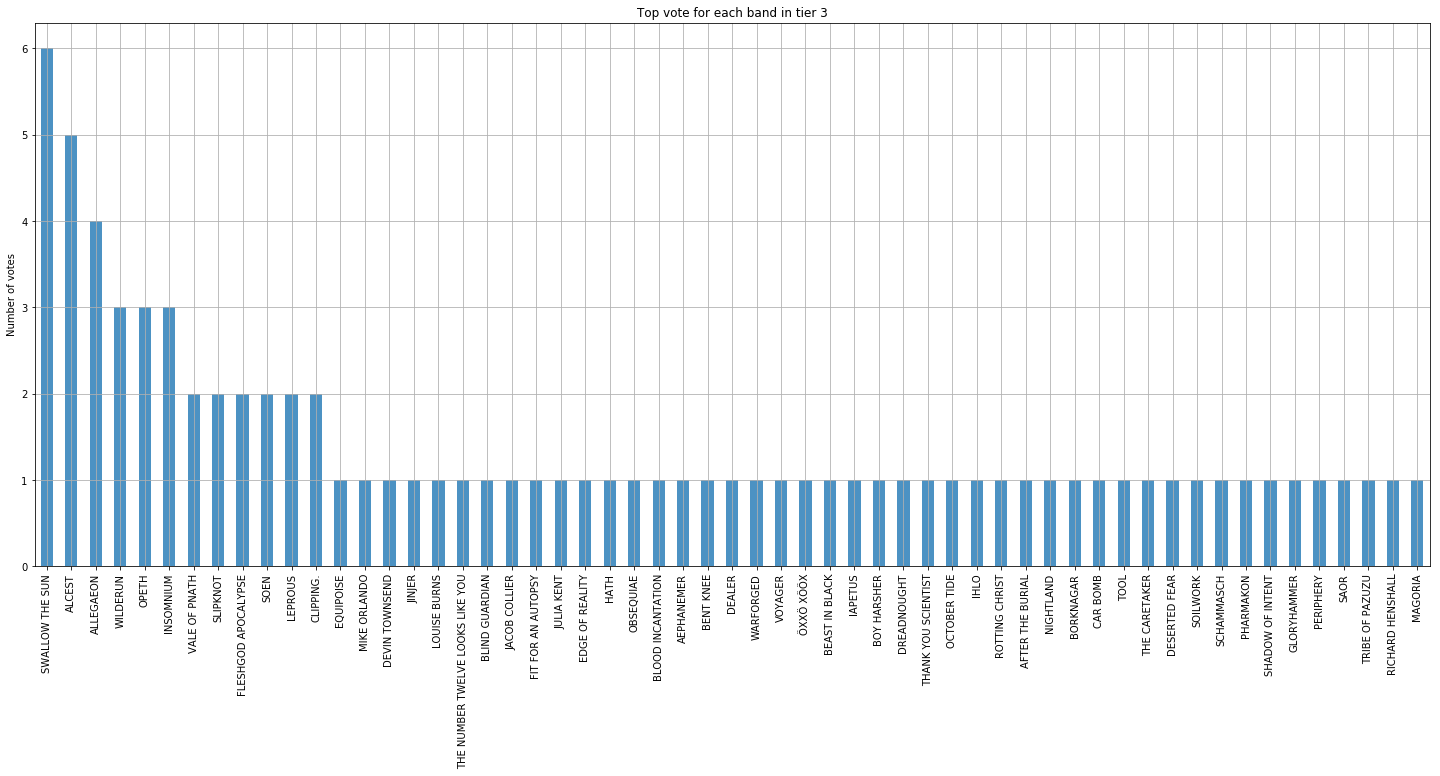

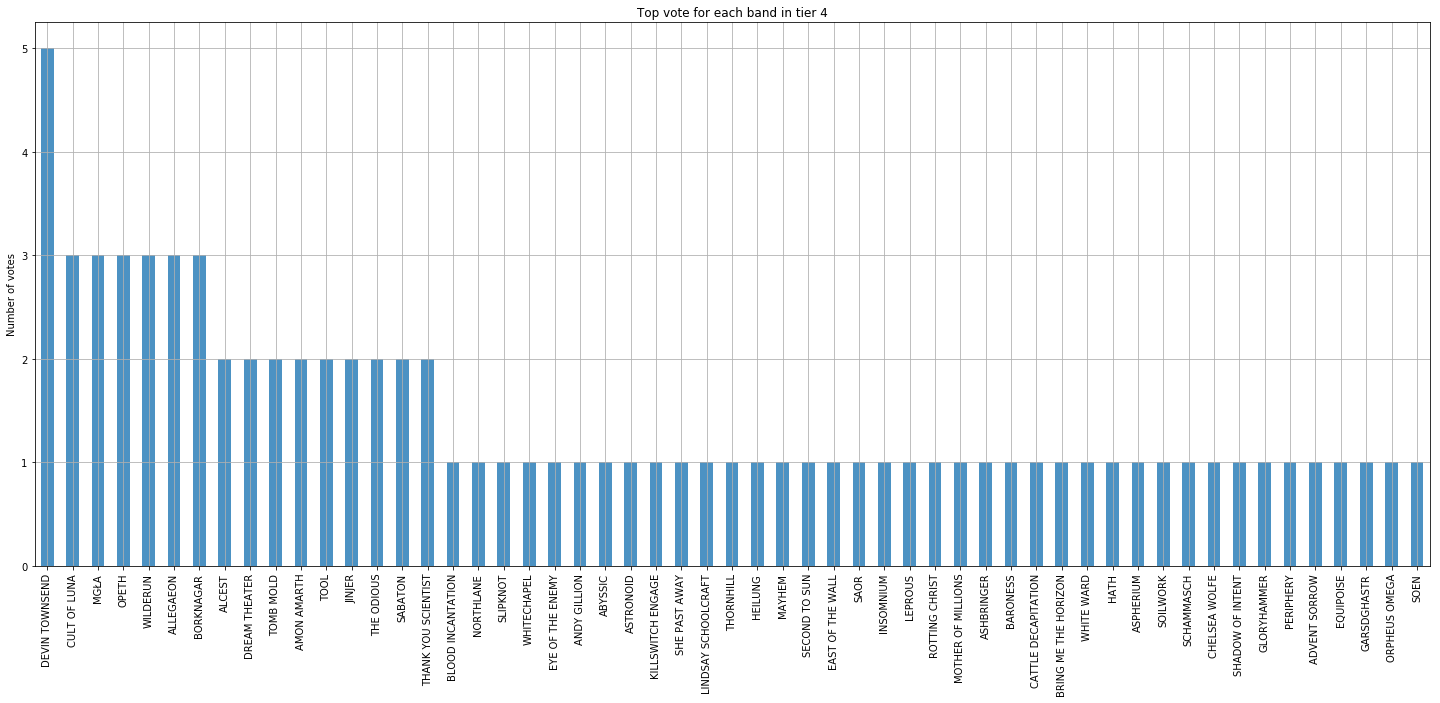

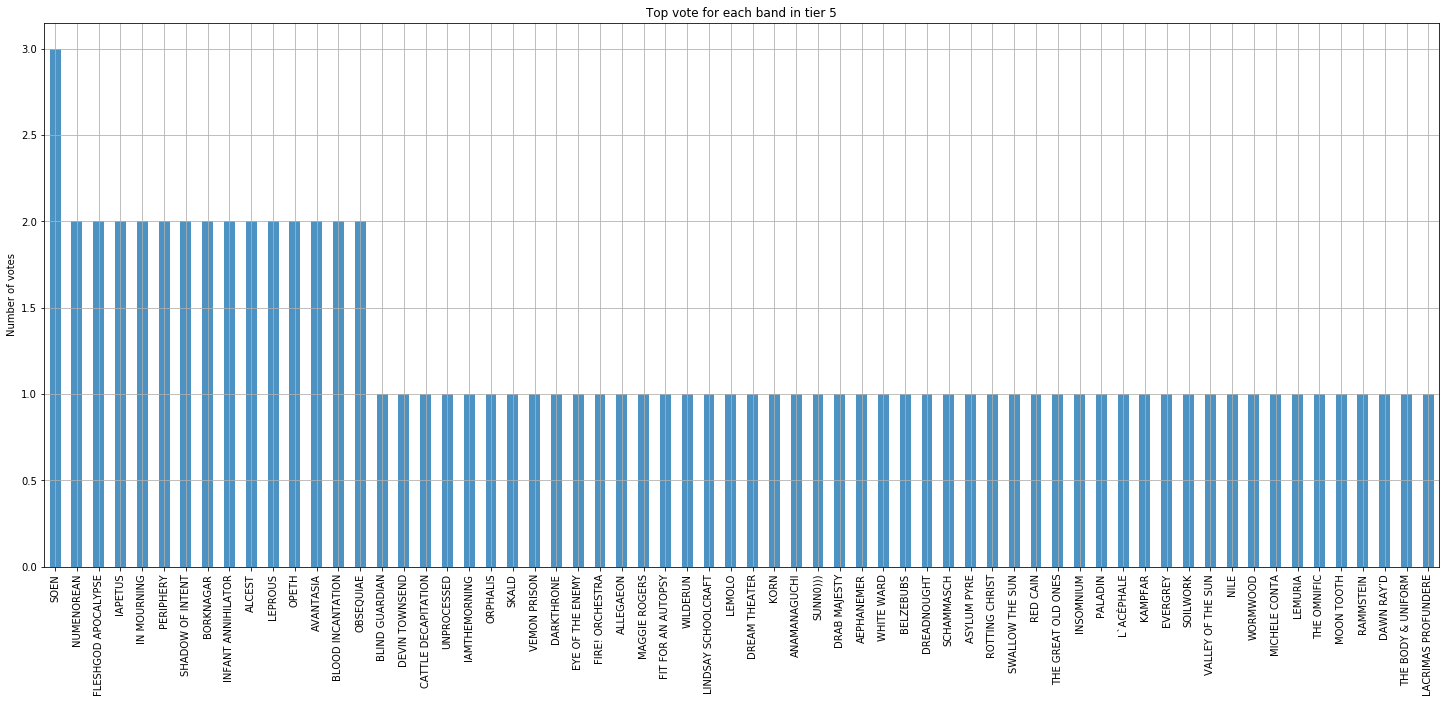

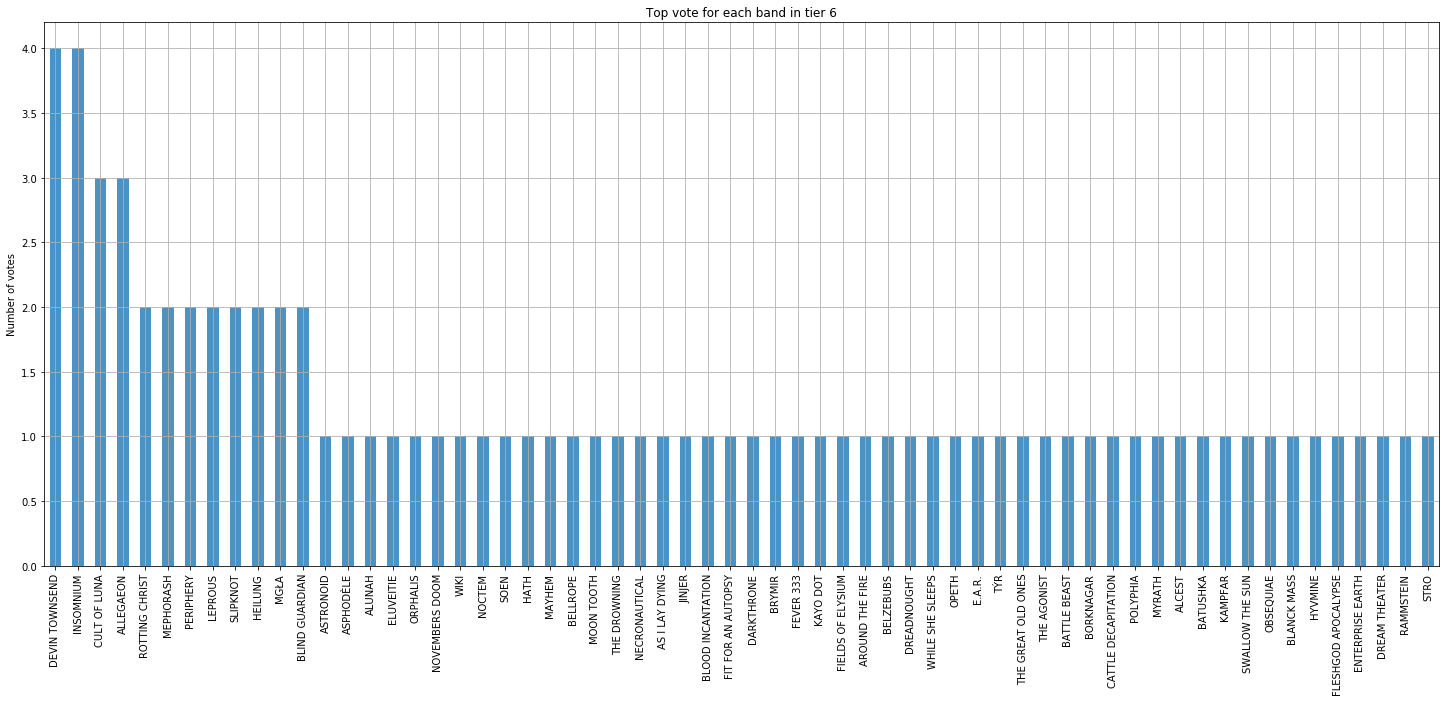

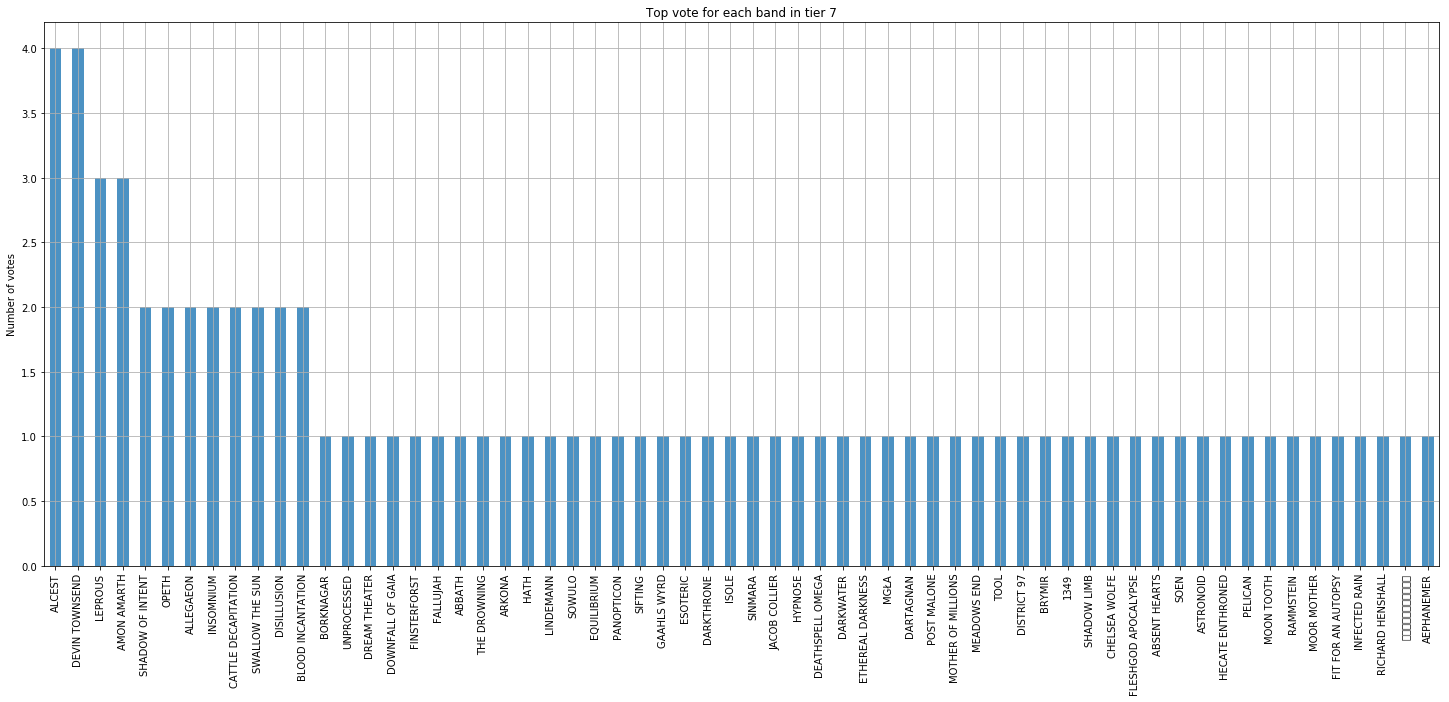

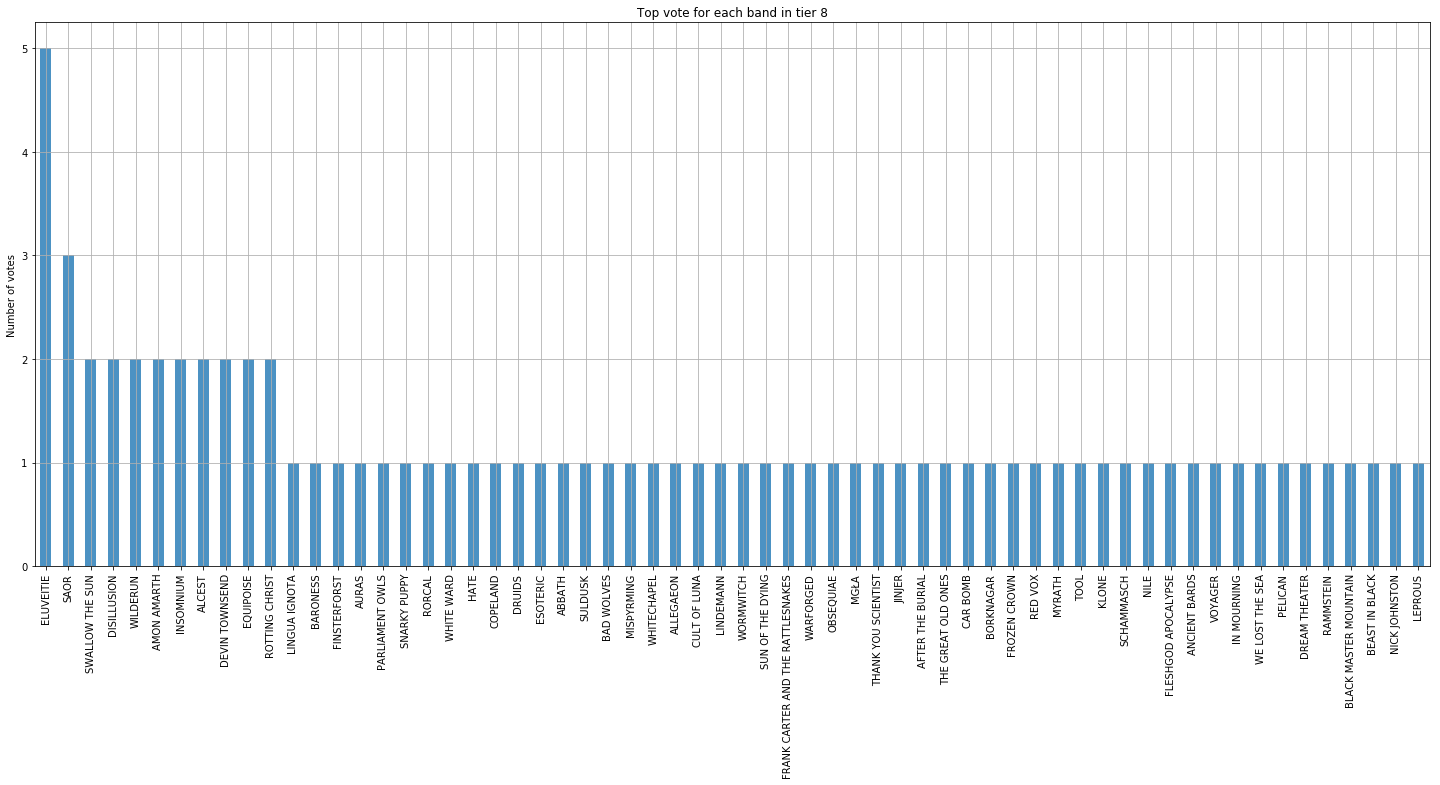

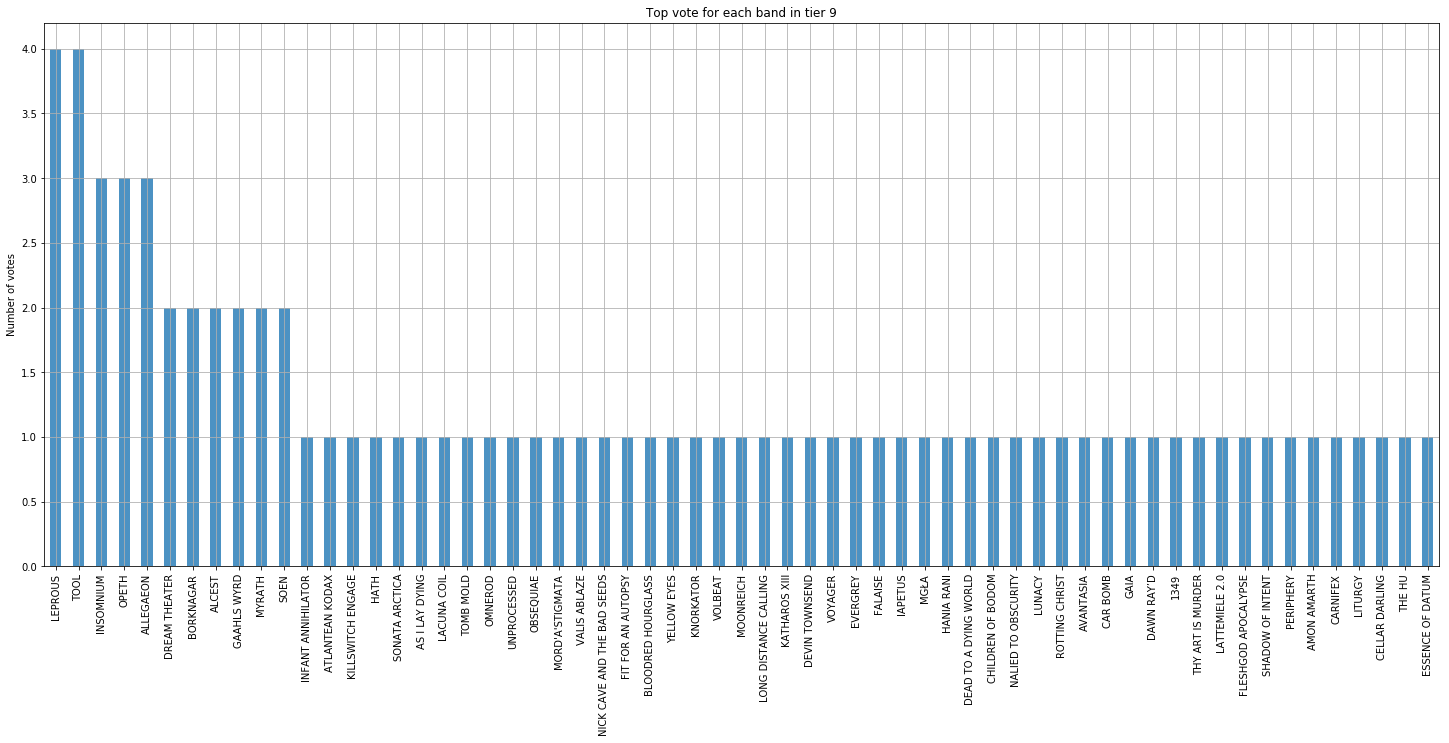

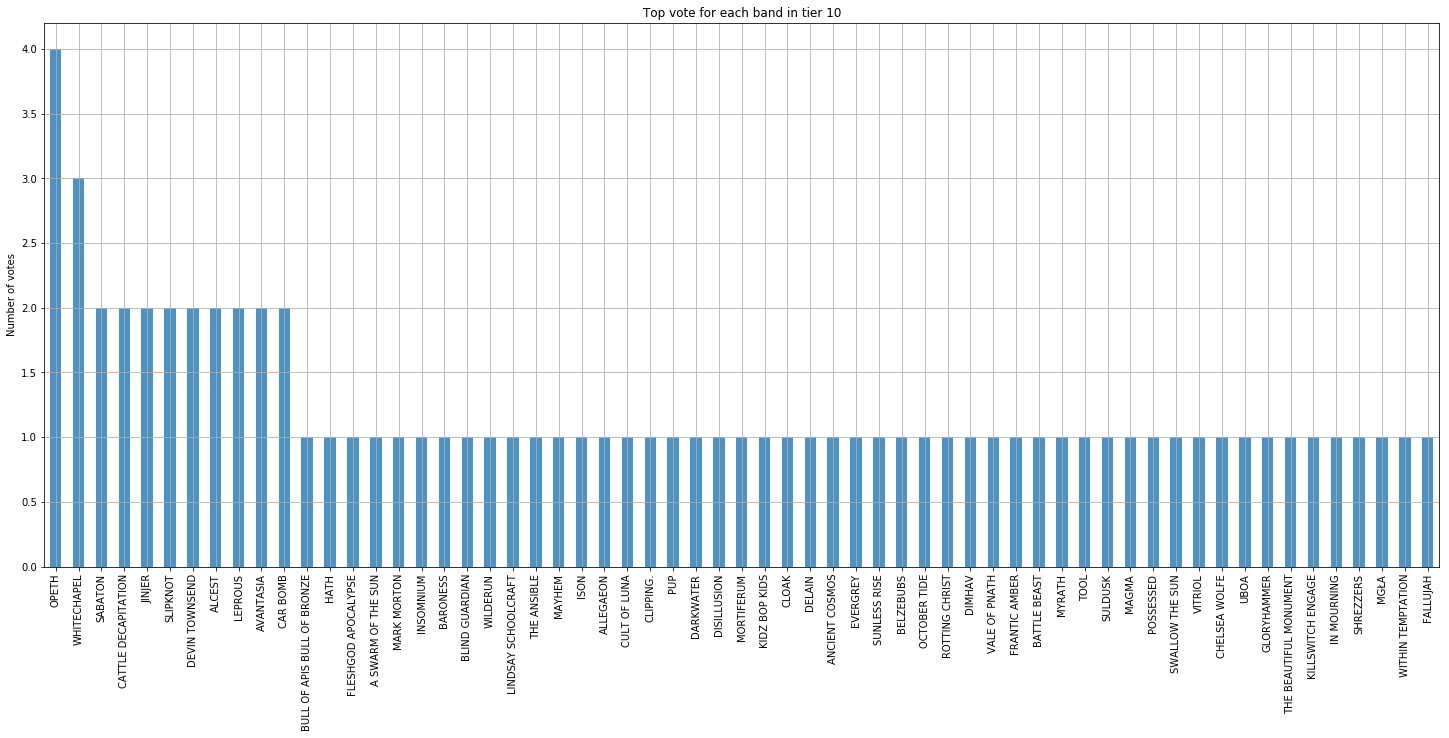

In [135]:
for ii in range (1,11):
    print(ii)
    pylab.figure(figsize=(25,10))
    band_count_list[ii].plot('bar', alpha=0.8)

    pylab.title(f'Top vote for each band in tier {ii}')
    pylab.ylabel('Number of votes')
    pylab.grid()

## Lets look at how many votes each band got in total

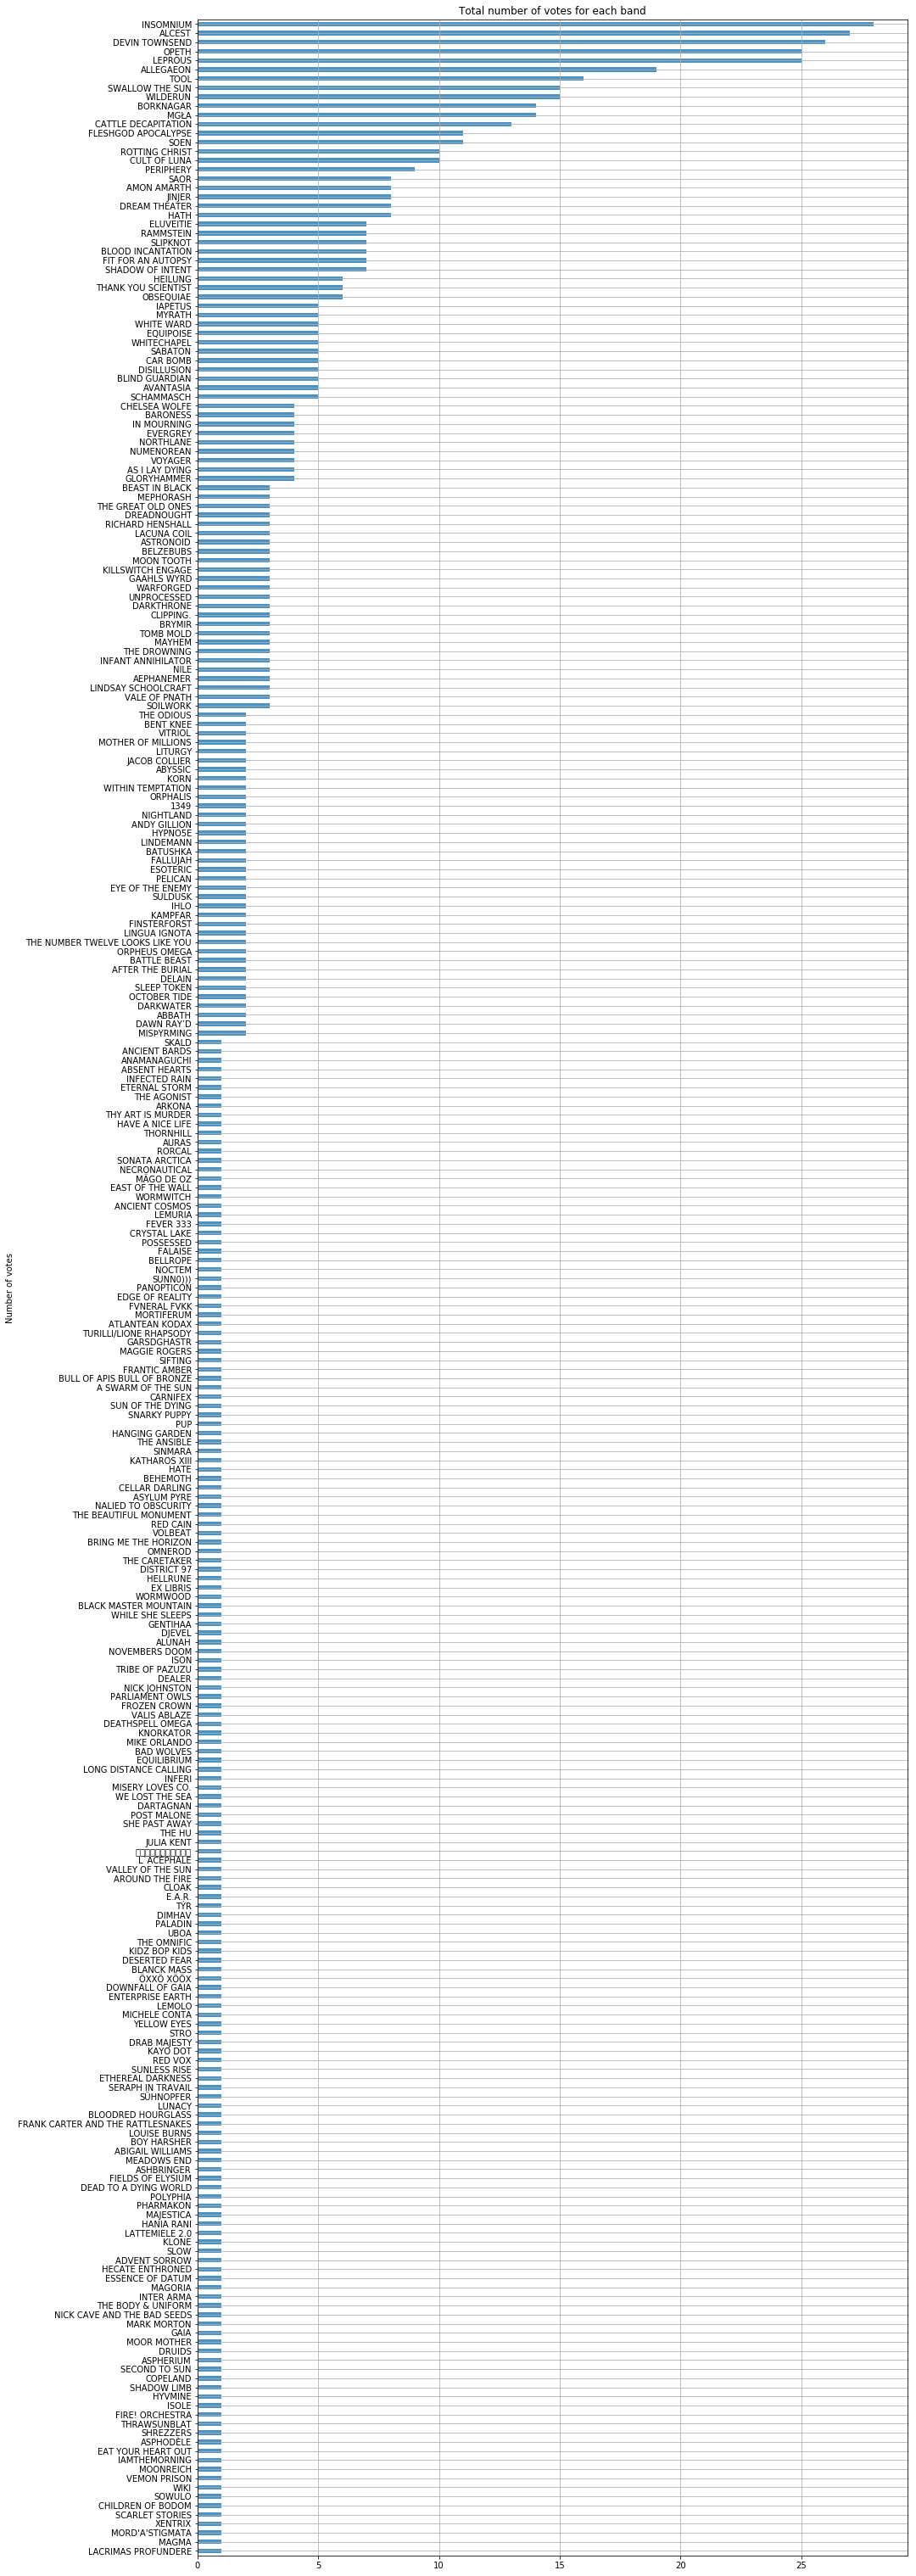

In [136]:

pylab.figure(figsize=(15,55))
stack = []   ## Merge all of the counts
for ii in range(band.shape[1]):
    for jj in range(band.shape[0]):
        stack.append(band[jj, ii])

bname = pd.Series(stack).value_counts(ascending=True)
pd.Series(stack).value_counts(ascending=True).plot('barh', alpha=0.8)

pylab.title('Total number of votes for each band')
pylab.ylabel('Number of votes')
pylab.grid()
pylab.savefig('TotalVotes.png')

## And again for each album 

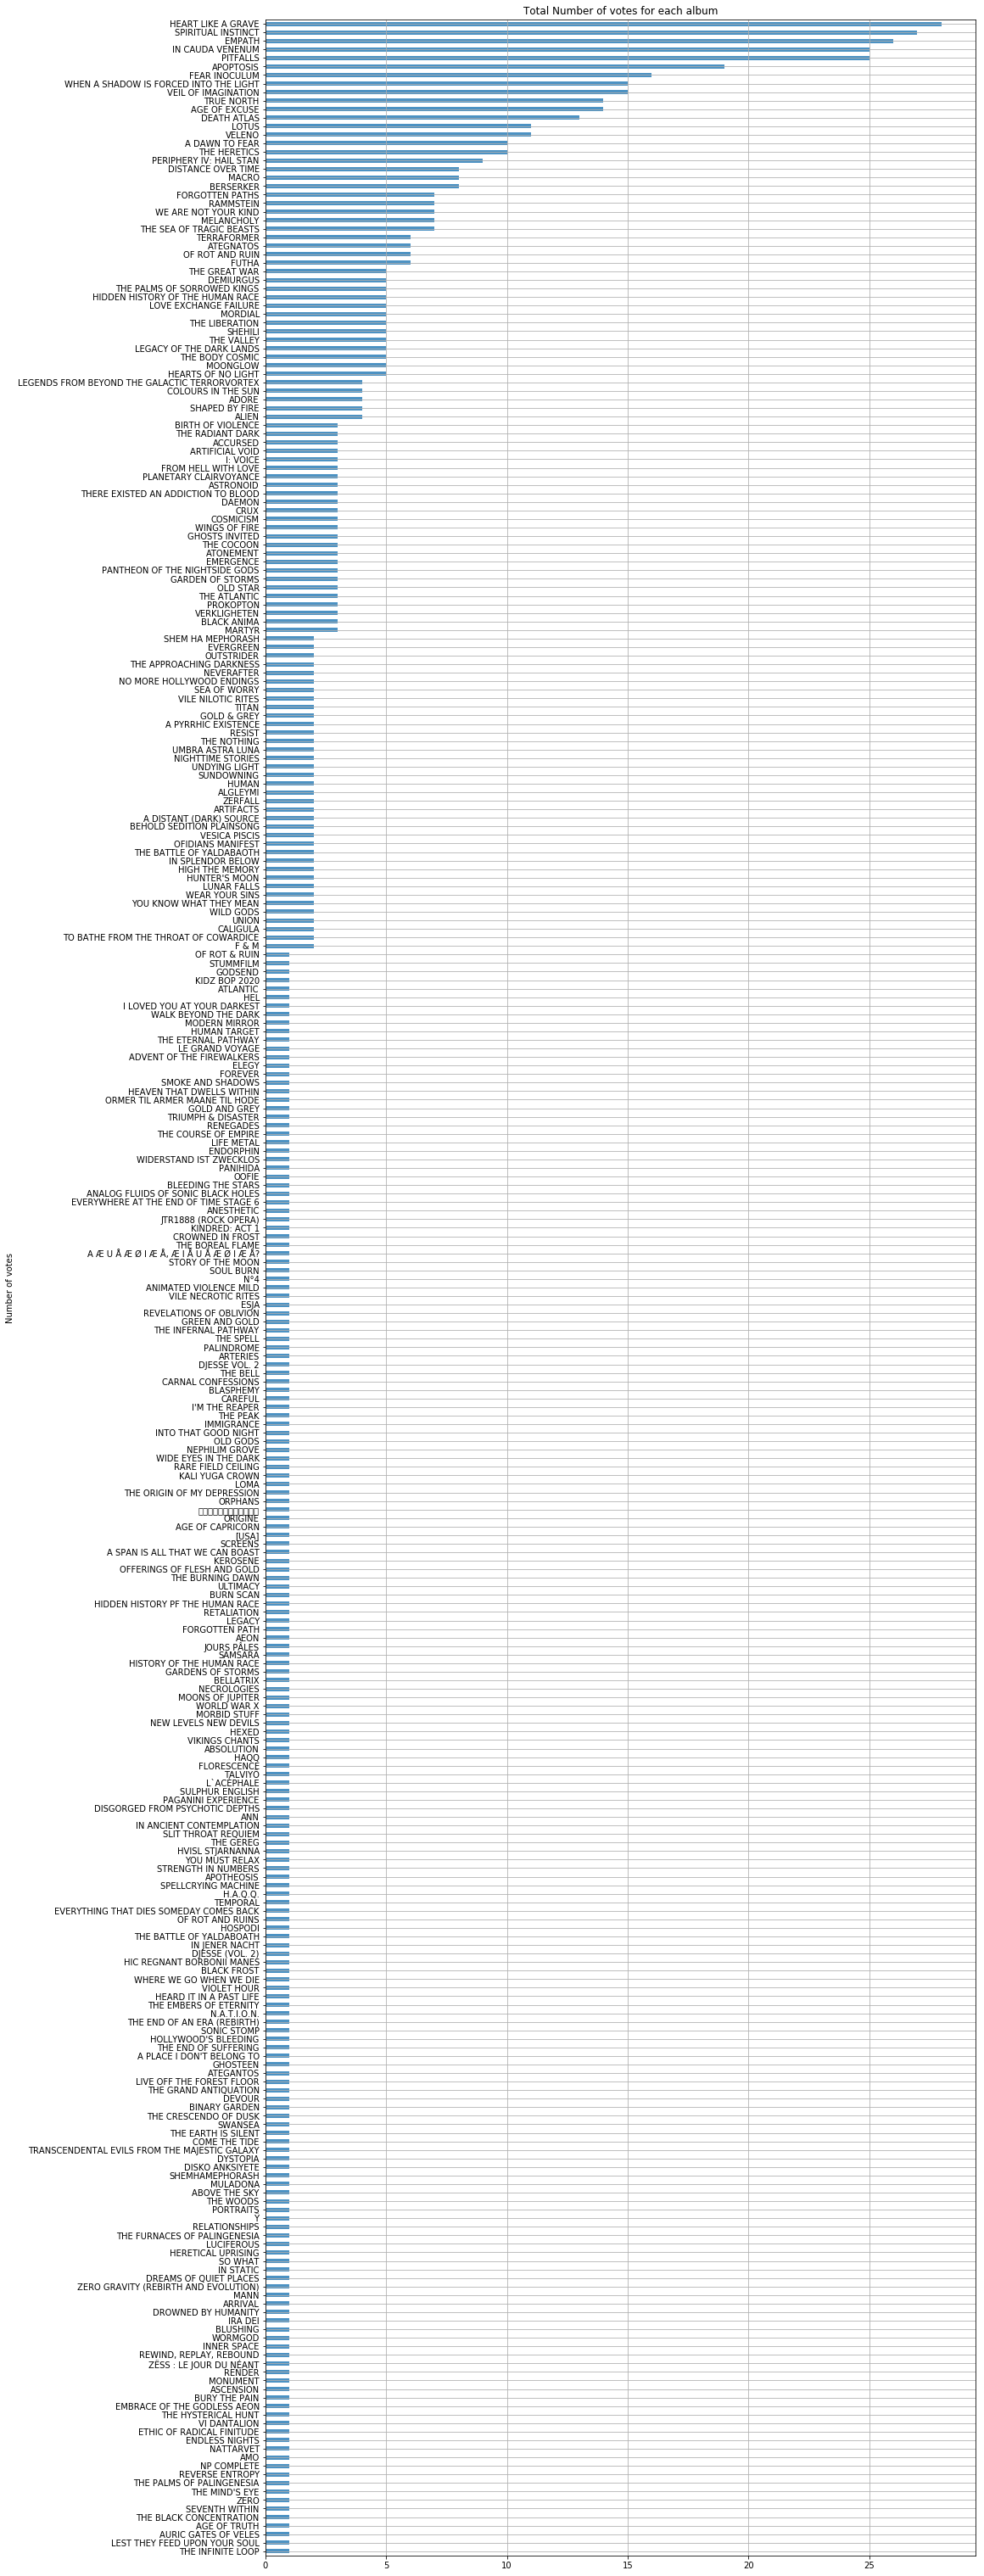

In [137]:
pylab.figure(figsize=(15, 55))
stack = []
for ii in range(album.shape[1]):
    for jj in range(album.shape[0]):
        stack.append(album[jj, ii])

aname = pd.Series(stack).value_counts(ascending=True)
pd.Series(stack).value_counts(ascending=True).plot('barh', alpha=0.8)

pylab.title('Total Number of votes for each album')
pylab.ylabel('Number of votes')
pylab.grid()
pylab.savefig('TotalVotesAlbum.png')



##  Okay next we need to applay a score based on each voting tier.


In [138]:
pd_score = pd.concat([band_count_list[1]* 10, band_count_list[2] * 9, band_count_list[3] * 8, band_count_list[4] * 7, band_count_list[5] * 6, band_count_list[6] * 5, band_count_list[7] * 4, band_count_list[8] * 3, band_count_list[9] * 2, band_count_list[10]], axis=1, sort=True).fillna(0)
pd_score.head(10)

,0,1,2,3,4,5,6,7,8,9
1349,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0
A SWARM OF THE SUN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ABBATH,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0
ABIGAIL WILLIAMS,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABSENT HEARTS,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
ABYSSIC,0.0,9.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
ADVENT SORROW,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
AEPHANEMER,0.0,0.0,8.0,0.0,6.0,0.0,4.0,0.0,0.0,0.0
AFTER THE BURIAL,0.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
ALCEST,30.0,36.0,40.0,14.0,12.0,5.0,16.0,6.0,4.0,2.0


In [166]:
label = []
for ii in range(-12, 0):
    label.append(bname.index[ii] + ' - ' + aname.index[ii])
    #print(bname.index[ii] + ' - ' + aname.index[ii])
label

['CATTLE DECAPITATION - DEATH ATLAS',
 'MGŁA - AGE OF EXCUSE',
 'BORKNAGAR - TRUE NORTH',
 'WILDERUN - VEIL OF IMAGINATION',
 'SWALLOW THE SUN - WHEN A SHADOW IS FORCED INTO THE LIGHT',
 'TOOL - FEAR INOCULUM',
 'ALLEGAEON - APOPTOSIS',
 'LEPROUS - PITFALLS',
 'OPETH - IN CAUDA VENENUM',
 'DEVIN TOWNSEND - EMPATH',
 'ALCEST - SPIRITUAL INSTINCT',
 'INSOMNIUM - HEART LIKE A GRAVE']

In [167]:
label_top10 = ['INSOMNIUM - HEART LIKE A GRAVE', 'ALCEST - SPIRITUAL INSTINCT', 'DEVIN TOWNSEND - EMPATH', 'OPETH - IN CAUDA VENENUM', 'LEPROUS - PITFALLS', 'WILDERUN - VEIL OF IMAGINATION','ALLEGAEON - APOPTOSIS','TOOL - FEAR INOCULUM','SWALLOW THE SUN - WHEN A SHADOW IS FORCED INTO THE LIGHT', 'MGŁA - AGE OF EXCUSE' ]

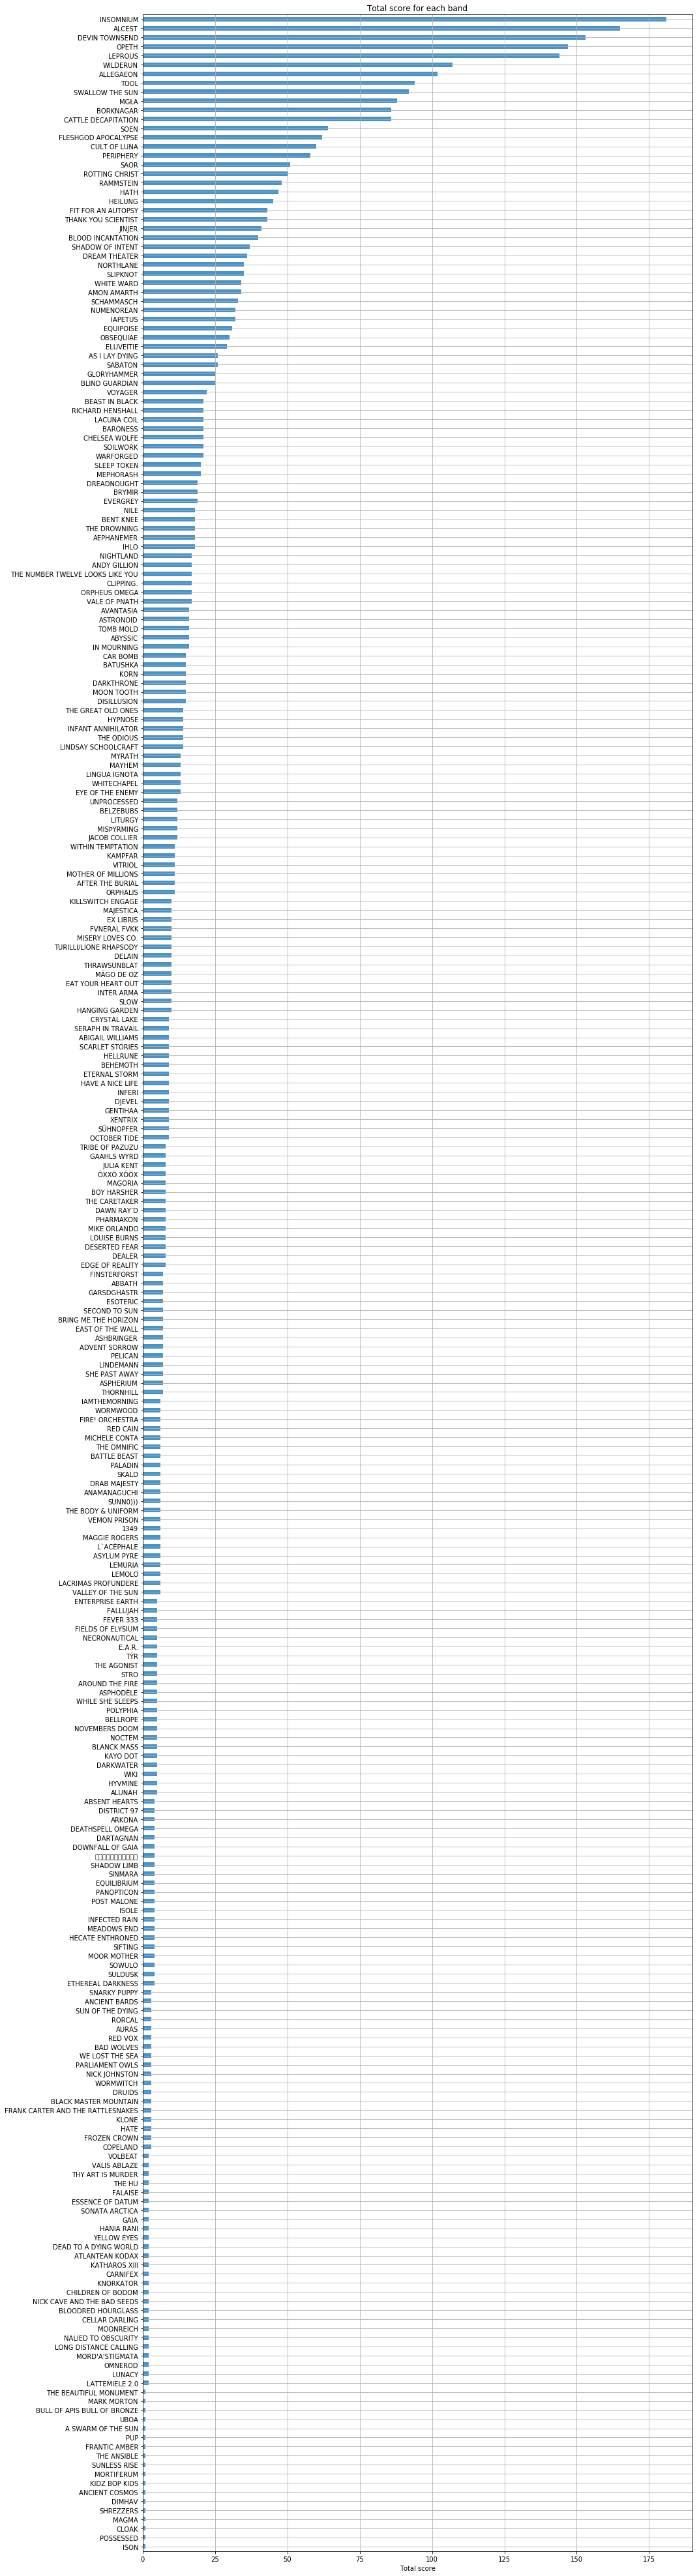

In [141]:
pylab.figure(figsize=(15,55))

#pylab.font_manager.FontProperties(fname=os.path.expanduser('~/Library/Fonts/ipaexg.ttf'))

total_score = pd_score.sum(axis=1)
#total_score.sort()
ax = total_score.sort_values(ascending=True).plot('barh', alpha=0.8)
ax.xaxis.tick_top()
ax.xaxis.tick_bottom()

pylab.title('Total score for each band')
pylab.xlabel('Total score')
pylab.grid()
pylab.tight_layout()
pylab.savefig('Total.png')


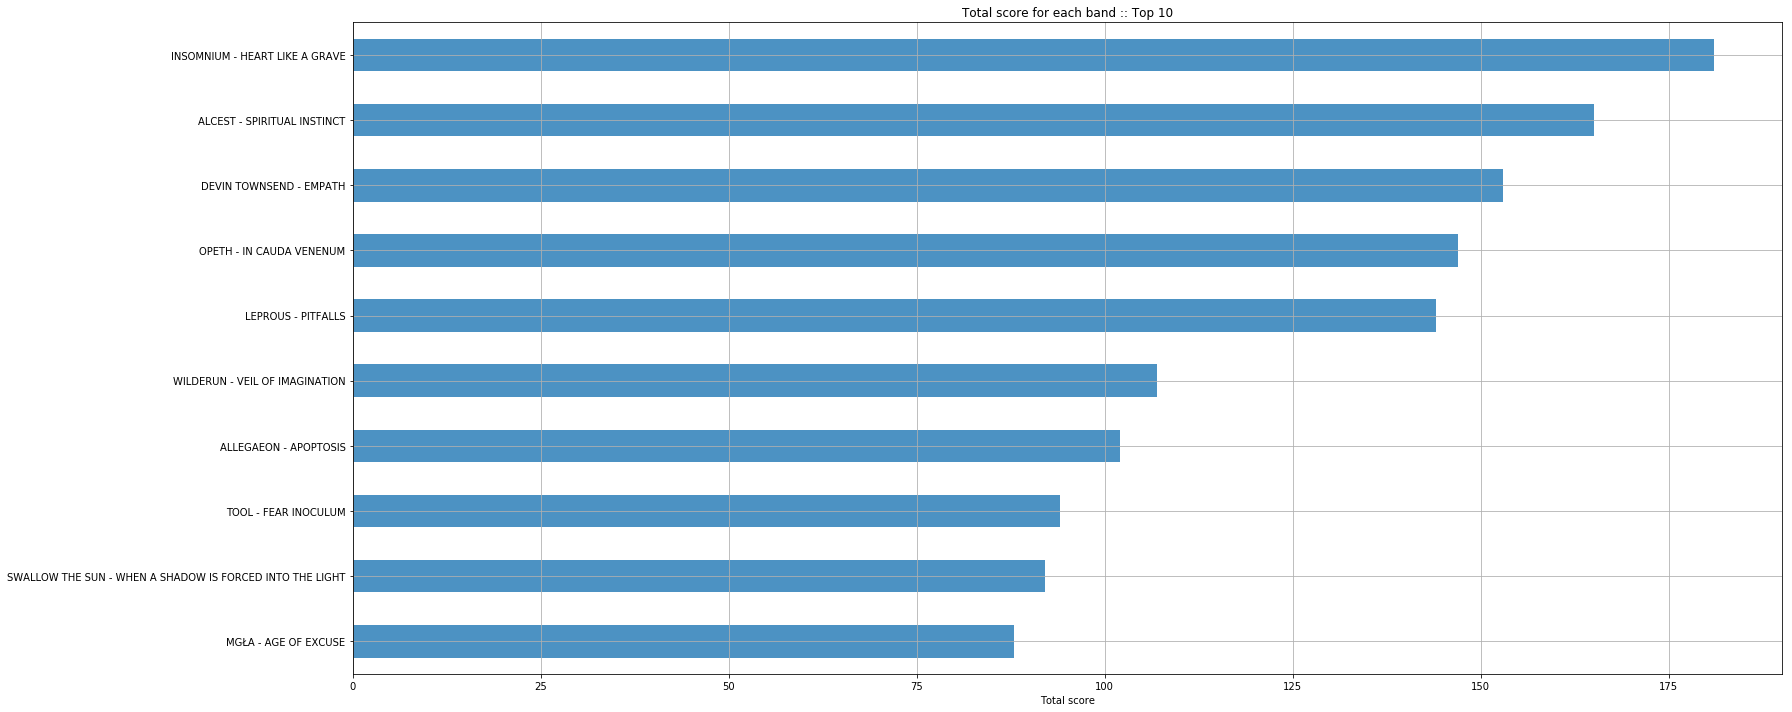

In [180]:
pylab.figure(figsize=(25,10))


total_score = pd_score.sum(axis=1)
#total_score.sort()
total_score.sort_values(ascending=True)[-10:].plot('barh', alpha=0.8)

pylab.title('Total score for each band :: Top 10')
pylab.xlabel('Total score')
ax = pylab.gca()
label_top10.reverse()
ax.set_yticklabels(label_top10)
pylab.grid()

pylab.tight_layout()
pylab.savefig('Top10.png')

In [179]:
label_top10.reverse()

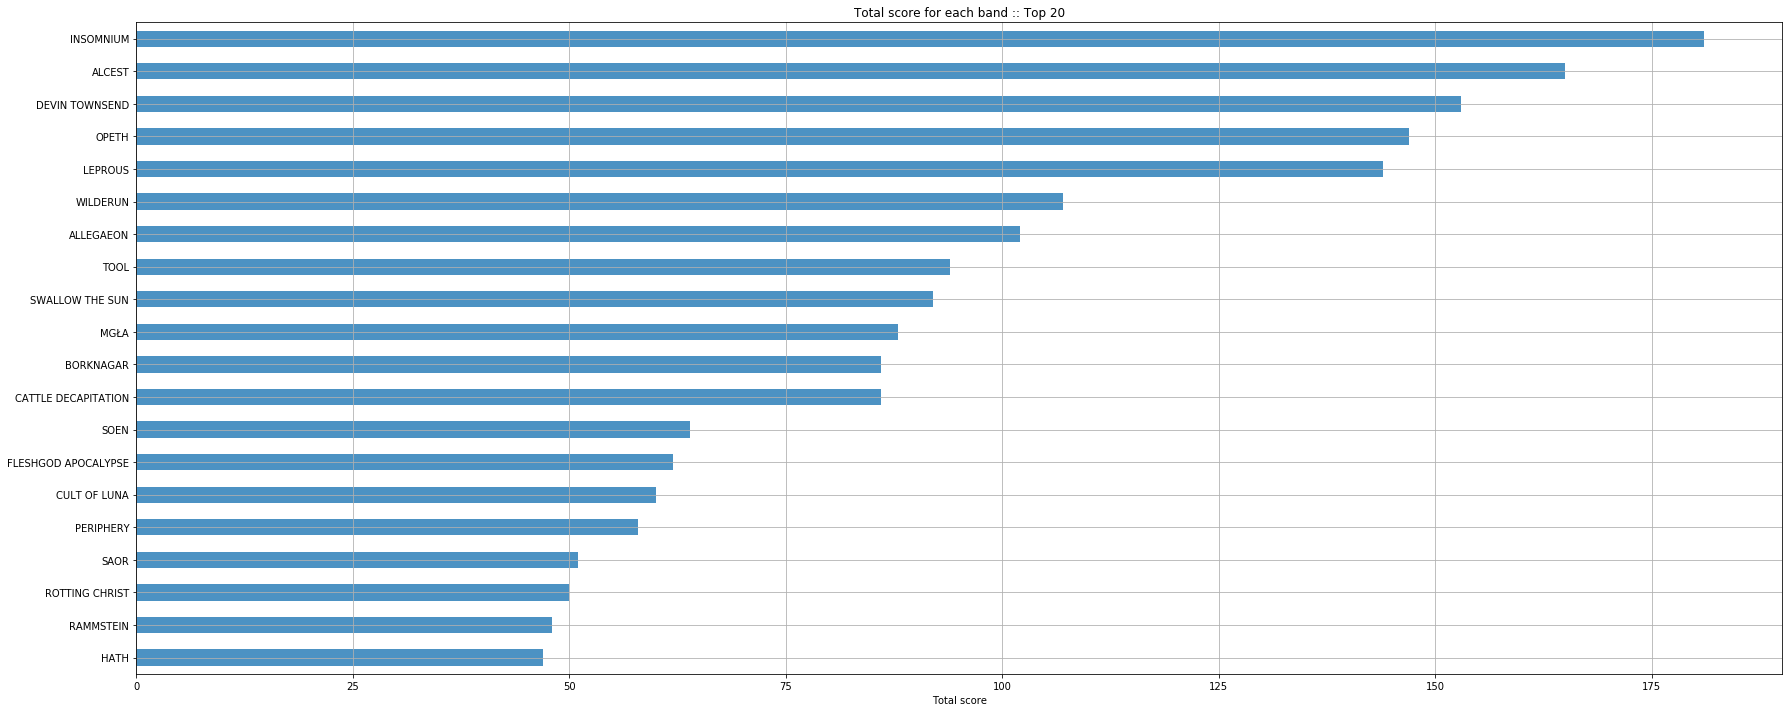

In [143]:
pylab.figure(figsize=(25,10))


total_score = pd_score.sum(axis=1)
#total_score.sort()
total_score.sort_values(ascending=True)[-20:].plot('barh', alpha=0.8)

pylab.title('Total score for each band :: Top 20')
pylab.xlabel('Total score')

pylab.tight_layout()
pylab.grid()
pylab.savefig('Top20.png')



## Now we do that for each voting tier 

<div class="alert alert-info" role="alert">
  We export the data to excel 
</div>

In [144]:
pd_score.to_excel('scores.xlsx')